<h1>House prices - ETL</h1>

<h2>Install and import libraries</h2>

In [45]:
#pip install scikit-learn

In [47]:
#pip install seaborn

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import copy

import LibrairiePerso_v4_8 as ownLibrary
import seaborn as sns 

import importlib

In [2]:
import os
cwd = os.getcwd()

dataset = pd.read_csv(cwd + "\\work.csv", sep=",")
submission = pd.read_csv(cwd + "\\submission.csv", sep=",")

len(dataset)

1460

In [3]:
pd.set_option('display.max_columns', 500)

## Split Train/Test

In [4]:
exp = list(dataset.columns.values)
exp.remove('SalePrice')
X = dataset[exp]
y = dataset['SalePrice']

X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=0.3 , 
                            random_state= 100 )

In [5]:
X_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
210,211,30,RL,67.0,5604,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1925,1950,Gable,CompShg,Stucco,Stucco,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468,Unf,0,396,864,GasA,TA,N,FuseA,864,0,0,864,1,0,1,0,2,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,96,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal
318,319,60,RL,90.0,9900,Pave,NaN,Reg,Low,AllPub,Inside,Mod,NoRidge,Norm,Norm,1Fam,2Story,7,5,1993,1993,Gable,CompShg,HdBoard,HdBoard,BrkFace,256.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,987,Unf,0,360,1347,GasA,Ex,Y,SBrkr,1372,1274,0,2646,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,1993.0,RFn,3,656,TA,TA,Y,340,60,144,0,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal
239,240,50,RL,52.0,8741,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1.5Fin,6,4,1945,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,Fa,No,LwQ,94,Unf,0,641,735,GasA,TA,Y,FuseA,798,689,0,1487,0,0,1,1,3,1,TA,7,Typ,1,Gd,Detchd,1949.0,Unf,1,220,TA,TA,Y,0,140,0,0,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal
986,987,50,RM,59.0,5310,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Feedr,Norm,1Fam,1.5Fin,6,8,1910,2003,Hip,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,Fa,No,Unf,0,Unf,0,485,485,GasA,Gd,Y,SBrkr,1001,634,0,1635,0,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,255,Fa,TA,Y,394,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1416,1417,190,RM,60.0,11340,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,6,1885,1950,Gable,CompShg,VinylSd,AsbShng,None,0.0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,777,777,GasA,Gd,Y,SBrkr,1246,1044,0,2290,0,0,2,0,4,2,TA,11,Typ,0,NaN,Detchd,1971.0,Unf,2,560,TA,TA,N,0,0,114,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


# Replacements

## Replacements for continuous features

<p>
There are several NAN values in the data, for the features <strong>MasVnrArea</strong> and <strong>LotFrontage</strong>.<br>
We pick the median values for these features in X_train, for each Neighborhood.<br>
Then we put these values in X_train, X_test and submission according to the Neighborhood observed.
</p>

In [6]:
X_train_MasVnrArea_medians_by_Neighborhood = X_train.groupby("Neighborhood")["MasVnrArea"].median().to_frame()
X_train_LotFrontage_medians_by_Neighborhood = X_train.groupby("Neighborhood")["LotFrontage"].median().to_frame()

for df in [X_train, X_test, submission]:
    ownLibrary.replaceByGroupMedian(df, X_train_MasVnrArea_medians_by_Neighborhood, "MasVnrArea", "Neighborhood")
    ownLibrary.replaceByGroupMedian(df, X_train_LotFrontage_medians_by_Neighborhood, "LotFrontage", "Neighborhood")

d:\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


<p>
    Here, we simply replace the NAN values by 0. <br>
    Indeed, a NAN value means no garage or no basement for theses features
</p>

In [7]:
for df in [X_train, X_test, submission]:   
        
    for col in ('GarageYrBlt','GarageArea', 'GarageCars'):
        df.loc[:, col] = df[col].fillna(0)       
    for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF'):
        df.loc[:, col] = df[col].fillna(0)
    for col in ('BsmtFullBath', 'BsmtHalfBath'):
        df.loc[:, col] = df[col].fillna(0)


d:\python39\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [8]:
'''
for df in [X_train, X_test, submission]:
    df.loc[:, 'GarageCars'] = df['GarageCars'].astype(int)
    df.loc[:, 'BsmtFullBath'] = df['BsmtFullBath'].astype(int)
    df.loc[:, 'BsmtHalfBath'] = df['BsmtHalfBath'].astype(int)
'''

## Replacements for categorical features

<p>
The categorical features also present some NAN values.<br>
For the following list of categorical features, NAN is not a missing value.<br>
For example, a house without pool will have the PoolQc feature set to NAN.<br>
We replace each NAN by the text "eNA" to recognize them later.
</p>

In [8]:
for df in [X_train, X_test, submission]:
    df.Alley.fillna("eNA", inplace = True)
    df.BsmtCond.fillna("eNA", inplace = True)
    df.BsmtQual.fillna("eNA", inplace = True)
    df.BsmtExposure.fillna("eNA", inplace = True)
    df.BsmtFinType1.fillna("eNA", inplace = True)
    df.BsmtFinType2.fillna("eNA", inplace = True)
    df.FireplaceQu.fillna("eNA", inplace = True)
    df.GarageType.fillna("eNA", inplace = True)
    df.GarageFinish.fillna("eNA", inplace = True)
    df.GarageQual.fillna("eNA", inplace = True)
    df.GarageCond.fillna("eNA", inplace = True)
    df.Fence.fillna("eNA", inplace = True)
    df.MiscFeature.fillna("eNA", inplace = True)
    df.PoolQC.fillna("eNa", inplace = True)

d:\python39\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


<p>
NA is a missing value for these categorical features.<br>
We replace each NAN value by the most occuring value
</p>

In [9]:
for df in [X_train, X_test, submission]:
    df['MasVnrType'].fillna(df['MasVnrType'].mode()[0], inplace = True)
    df['Functional'].fillna(df['Functional'].mode()[0], inplace = True)
    df['MSZoning'].fillna(df['MSZoning'].mode()[0], inplace = True)
    df['Electrical'].fillna(df['Electrical'].mode()[0], inplace = True)
    df['KitchenQual'].fillna(df['KitchenQual'].mode()[0], inplace = True)
    df['Exterior1st'].fillna(df['Exterior1st'].mode()[0], inplace = True)
    df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0], inplace = True)
    df['SaleType'].fillna(df['SaleType'].mode()[0], inplace = True)
    df['Utilities'].fillna(df['Utilities'].mode()[0], inplace = True)
    

# Creation of new features

In [10]:
for df in [X_train, X_test, submission]:
    df.loc[:, 'GarageCars'] = df['GarageCars'].astype(int)
    df.loc[:, 'BsmtFullBath'] = df['BsmtFullBath'].astype(int)
    df.loc[:, 'BsmtHalfBath'] = df['BsmtHalfBath'].astype(int)

In [11]:
X_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
210,211,30,RL,67.0,5604,Pave,eNA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1925,1950,Gable,CompShg,Stucco,Stucco,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468,Unf,0,396,864,GasA,TA,N,FuseA,864,0,0,864,1,0,1,0,2,1,TA,5,Typ,0,eNA,eNA,0.0,eNA,0,0,eNA,eNA,Y,0,0,96,0,0,0,eNa,eNA,eNA,0,4,2008,WD,Normal
318,319,60,RL,90.0,9900,Pave,eNA,Reg,Low,AllPub,Inside,Mod,NoRidge,Norm,Norm,1Fam,2Story,7,5,1993,1993,Gable,CompShg,HdBoard,HdBoard,BrkFace,256.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,987,Unf,0,360,1347,GasA,Ex,Y,SBrkr,1372,1274,0,2646,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,1993.0,RFn,3,656,TA,TA,Y,340,60,144,0,0,0,eNa,eNA,eNA,0,4,2009,WD,Normal
239,240,50,RL,52.0,8741,Pave,eNA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1.5Fin,6,4,1945,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,Fa,No,LwQ,94,Unf,0,641,735,GasA,TA,Y,FuseA,798,689,0,1487,0,0,1,1,3,1,TA,7,Typ,1,Gd,Detchd,1949.0,Unf,1,220,TA,TA,Y,0,140,0,0,0,0,eNa,MnPrv,eNA,0,4,2010,WD,Normal
986,987,50,RM,59.0,5310,Pave,eNA,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Feedr,Norm,1Fam,1.5Fin,6,8,1910,2003,Hip,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,Fa,No,Unf,0,Unf,0,485,485,GasA,Gd,Y,SBrkr,1001,634,0,1635,0,0,1,0,2,1,Gd,5,Typ,0,eNA,Attchd,1950.0,Unf,1,255,Fa,TA,Y,394,0,0,0,0,0,eNa,eNA,eNA,0,6,2006,WD,Normal
1416,1417,190,RM,60.0,11340,Pave,eNA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,6,1885,1950,Gable,CompShg,VinylSd,AsbShng,None,0.0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,777,777,GasA,Gd,Y,SBrkr,1246,1044,0,2290,0,0,2,0,4,2,TA,11,Typ,0,eNA,Detchd,1971.0,Unf,2,560,TA,TA,N,0,0,114,0,0,0,eNa,eNA,eNA,0,4,2010,WD,Normal


<p>
We create new features.<br>
For example, doing the addition of :<br>
    <ul>
        <li>The first floor surface</li>
        <li>The second floor surface</li>
        <li>The basement surface</li>
    </ul>
Will result in a new feature that we call the "Total Surface of the house" : TotalSF.<br>

We also create some bolean features indicating if the house has : a pool / garage / fireplace / basement / 2nd floor
</p>

In [12]:

for df in [X_train, X_test, submission]:
    df.loc[:, 'YrBltAndRemod']=df['YearBuilt']+df['YearRemodAdd']
    df.loc[:, 'TotalSF']=df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

    df.loc[:, 'Total_sqr_footage'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'] +
                                     df['1stFlrSF'] + df['2ndFlrSF'])

    df.loc[:, 'Total_Bathrooms'] = (df['FullBath'] + (0.5 * df['HalfBath']) +
                                   df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))

    df.loc[:, 'Total_porch_sf'] = (df['OpenPorchSF'] + df['3SsnPorch'] +
                                  df['EnclosedPorch'] + df['ScreenPorch'] +
                                  df['WoodDeckSF'])

    df.loc[:, 'haspool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
    df.loc[:, 'has2ndfloor'] = df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
    df.loc[:, 'hasgarage'] = df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
    df.loc[:, 'hasbsmt'] = df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
    df.loc[:, 'hasfireplace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)


d:\python39\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
d:\python39\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [13]:
X_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,YrBltAndRemod,TotalSF,Total_sqr_footage,Total_Bathrooms,Total_porch_sf,haspool,has2ndfloor,hasgarage,hasbsmt,hasfireplace
210,211,30,RL,67.0,5604,Pave,eNA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1925,1950,Gable,CompShg,Stucco,Stucco,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468,Unf,0,396,864,GasA,TA,N,FuseA,864,0,0,864,1,0,1,0,2,1,TA,5,Typ,0,eNA,eNA,0.0,eNA,0,0,eNA,eNA,Y,0,0,96,0,0,0,eNa,eNA,eNA,0,4,2008,WD,Normal,3875,1728,1332,2.0,96,0,0,0,1,0
318,319,60,RL,90.0,9900,Pave,eNA,Reg,Low,AllPub,Inside,Mod,NoRidge,Norm,Norm,1Fam,2Story,7,5,1993,1993,Gable,CompShg,HdBoard,HdBoard,BrkFace,256.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,987,Unf,0,360,1347,GasA,Ex,Y,SBrkr,1372,1274,0,2646,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,1993.0,RFn,3,656,TA,TA,Y,340,60,144,0,0,0,eNa,eNA,eNA,0,4,2009,WD,Normal,3986,3993,3633,3.5,544,0,1,1,1,1
239,240,50,RL,52.0,8741,Pave,eNA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1.5Fin,6,4,1945,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,Fa,No,LwQ,94,Unf,0,641,735,GasA,TA,Y,FuseA,798,689,0,1487,0,0,1,1,3,1,TA,7,Typ,1,Gd,Detchd,1949.0,Unf,1,220,TA,TA,Y,0,140,0,0,0,0,eNa,MnPrv,eNA,0,4,2010,WD,Normal,3895,2222,1581,1.5,140,0,1,1,1,1
986,987,50,RM,59.0,5310,Pave,eNA,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Feedr,Norm,1Fam,1.5Fin,6,8,1910,2003,Hip,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,Fa,No,Unf,0,Unf,0,485,485,GasA,Gd,Y,SBrkr,1001,634,0,1635,0,0,1,0,2,1,Gd,5,Typ,0,eNA,Attchd,1950.0,Unf,1,255,Fa,TA,Y,394,0,0,0,0,0,eNa,eNA,eNA,0,6,2006,WD,Normal,3913,2120,1635,1.0,394,0,1,1,1,0
1416,1417,190,RM,60.0,11340,Pave,eNA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,6,1885,1950,Gable,CompShg,VinylSd,AsbShng,None,0.0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,777,777,GasA,Gd,Y,SBrkr,1246,1044,0,2290,0,0,2,0,4,2,TA,11,Typ,0,eNA,Detchd,1971.0,Unf,2,560,TA,TA,N,0,0,114,0,0,0,eNa,eNA,eNA,0,4,2010,WD,Normal,3835,3067,2290,2.0,114,0,1,1,1,0


# Delete not used features

<p>
We delete some features which have not enough occuring
</p>

In [14]:
for df in [X_train, X_test, submission]:
    df.drop(['Utilities'], axis=1, inplace=True)
    df.drop(['Street'], axis=1, inplace=True)
    df.drop(['Condition2'], axis=1, inplace=True)
    df.drop(['RoofMatl'], axis=1, inplace=True)
    df.drop(['Heating'], axis=1, inplace=True)
    df.drop(['LowQualFinSF'], axis=1, inplace=True)
    df.drop(['3SsnPorch'], axis=1, inplace=True)
    df.drop(['PoolArea'], axis=1, inplace=True)
    df.drop(['PoolQC'], axis=1, inplace=True)
    df.drop(['MiscFeature'], axis=1, inplace=True)

d:\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Outliers correction

In [15]:
for df in [X_train, X_test, submission]:
    df['LotFrontage'].clip(lower=30, upper = 110, inplace = True)
    df['YearBuilt'].clip(lower=1885, inplace = True)
    df['MasVnrArea'].clip(upper = 700, inplace = True)
    df['TotalBsmtSF'].clip(105,2077, inplace = True)
    df['1stFlrSF'].clip(upper = 2223, inplace = True)
    df['GrLivArea'].clip(upper = 2728, inplace = True)
    df['GarageArea'].clip(upper = 936, inplace = True)
    df['GarageYrBlt'].clip(lower=1910, inplace = True)

d:\python39\lib\site-packages\pandas\core\generic.py:7711: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._clip_with_scalar(lower, upper, inplace=inplace)


## Correction of the target feature distribution

In [16]:
y_train = y_train + X_train['MiscVal']
y_test = y_test + X_test['MiscVal']

d:\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 1.936395
Kurtosis: 7.344251


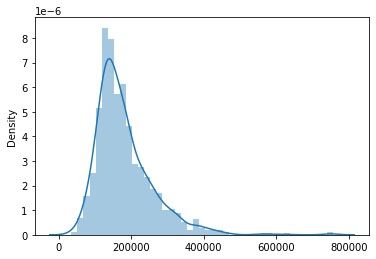

In [17]:
sns.distplot(y_train);
# skewness and kurtosis
print("Skewness: %f" % y_train.skew())
print("Kurtosis: %f" % y_train.kurt())

d:\python39\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
d:\python39\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
d:\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

Skewness: 0.167602
Kurtosis: 0.688627


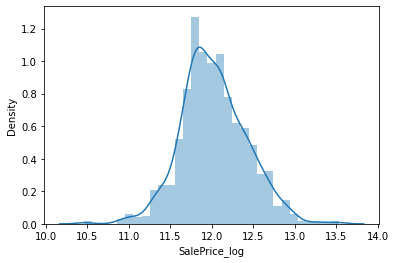

In [18]:
X_train.loc[:, 'SalePrice_log']  = np.log(y_train)
X_test.loc[:, 'SalePrice_log']  = np.log(y_test)
sns.distplot(X_train['SalePrice_log']);
# skewness and kurtosis
print("Skewness: %f" % X_train['SalePrice_log'].skew())
print("Kurtosis: %f" % X_train['SalePrice_log'].kurt())



## Scale Features

<p>
Available scale features methods
<ul>
<li>scaleMethod 0 : no scale</li>
<li>scaleMethod 1 : df[feature] = (df[feature] - df[feature].min()) / (df[feature].max() - df[feature].min())</li>
<li>scaleMethod 2 : df[feature] = df[feature] / df[feature].max()</li>
<li>scaleMethod 3 : df[feature] = (df[feature] - df[feature].mean()) / df[feature].std()</li>
<li>scaleMethod 4 : df = preprocessing.StandardScaler().fit(df[continuous_features]).transform(df[continuous_features])</li>
</ul>
Finally, not scaling the features gives a better accuracy to our best-performing model
</p>


In [19]:
continuous_features = ['LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageYrBlt','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','ScreenPorch']

for df in ['X_train','X_test','submission']:
    df = ownLibrary.scale_features(df, continuous_features, scaleMethod = 0)
    
print(X_train.shape)
X_train.head(5)

(1022, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,YrBltAndRemod,TotalSF,Total_sqr_footage,Total_Bathrooms,Total_porch_sf,haspool,has2ndfloor,hasgarage,hasbsmt,hasfireplace,SalePrice_log
210,211,30,RL,67.0,5604,eNA,Reg,Lvl,Inside,Gtl,Edwards,Norm,1Fam,1Story,5,6,1925,1950,Gable,Stucco,Stucco,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468,Unf,0,396,864,TA,N,FuseA,864,0,864,1,0,1,0,2,1,TA,5,Typ,0,eNA,eNA,1910.0,eNA,0,0,eNA,eNA,Y,0,0,96,0,eNA,0,4,2008,WD,Normal,3875,1728,1332,2.0,96,0,0,0,1,0,11.492723
318,319,60,RL,90.0,9900,eNA,Reg,Low,Inside,Mod,NoRidge,Norm,1Fam,2Story,7,5,1993,1993,Gable,HdBoard,HdBoard,BrkFace,256.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,987,Unf,0,360,1347,Ex,Y,SBrkr,1372,1274,2646,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,1993.0,RFn,3,656,TA,TA,Y,340,60,144,0,eNA,0,4,2009,WD,Normal,3986,3993,3633,3.5,544,0,1,1,1,1,12.468437
239,240,50,RL,52.0,8741,eNA,Reg,Lvl,Inside,Gtl,Edwards,Norm,1Fam,1.5Fin,6,4,1945,1950,Gable,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,Fa,No,LwQ,94,Unf,0,641,735,TA,Y,FuseA,798,689,1487,0,0,1,1,3,1,TA,7,Typ,1,Gd,Detchd,1949.0,Unf,1,220,TA,TA,Y,0,140,0,0,MnPrv,0,4,2010,WD,Normal,3895,2222,1581,1.5,140,0,1,1,1,1,11.635143
986,987,50,RM,59.0,5310,eNA,Reg,Lvl,Corner,Gtl,OldTown,Feedr,1Fam,1.5Fin,6,8,1910,2003,Hip,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,Fa,No,Unf,0,Unf,0,485,485,Gd,Y,SBrkr,1001,634,1635,0,0,1,0,2,1,Gd,5,Typ,0,eNA,Attchd,1950.0,Unf,1,255,Fa,TA,Y,394,0,0,0,eNA,0,6,2006,WD,Normal,3913,2120,1635,1.0,394,0,1,1,1,0,11.669929
1416,1417,190,RM,60.0,11340,eNA,Reg,Lvl,Inside,Gtl,OldTown,Norm,2fmCon,2Story,4,6,1885,1950,Gable,VinylSd,AsbShng,None,0.0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,777,777,Gd,Y,SBrkr,1246,1044,2290,0,0,2,0,4,2,TA,11,Typ,0,eNA,Detchd,1971.0,Unf,2,560,TA,TA,N,0,0,114,0,eNA,0,4,2010,WD,Normal,3835,3067,2290,2.0,114,0,1,1,1,0,11.715866


## Export

In [20]:
X_train.loc[:, 'SalePrice']  = y_train
X_train.to_csv (cwd + "\\data\\train_step_1.csv", index = False, header=True)
X_test.loc[:, 'SalePrice']  = y_test
X_test.to_csv (cwd + "\\data\\test_step_1.csv", index = False, header=True)

submission['SalePrice'] = 0
submission.to_csv (cwd + "\\data\\submission_step_1.csv", index = False, header=True)


d:\python39\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
d:\python39\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
